In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# Clasificación de Hongos como Venenosos o Comestibles

    Este conjunto de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos con branquias de las familias Agaricus y Lepiota 

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [2]:
columnas = ['Classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv("agaricus-lepiota.data", names = columnas)
df.head(3)

,Classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [3]:
df.dtypes

Classes                     object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
df = df.replace("?", pd.NA)

In [5]:
def datos_nulos(df):
    
    columnas = df.columns.values.tolist()

    for c, i in enumerate(columnas):
        p = columnas[c]
        v = pd.isna(df[columnas[c]]).values.ravel().sum()
        print(f"La columna {p} tiene {v} datos nulos" )

In [6]:
datos_nulos(df)

La columna Classes tiene 0 datos nulos
La columna cap-shape tiene 0 datos nulos
La columna cap-surface tiene 0 datos nulos
La columna cap-color tiene 0 datos nulos
La columna bruises? tiene 0 datos nulos
La columna odor tiene 0 datos nulos
La columna gill-attachment tiene 0 datos nulos
La columna gill-spacing tiene 0 datos nulos
La columna gill-size tiene 0 datos nulos
La columna gill-color tiene 0 datos nulos
La columna stalk-shape tiene 0 datos nulos
La columna stalk-root tiene 2480 datos nulos
La columna stalk-surface-above-ring tiene 0 datos nulos
La columna stalk-surface-below-ring tiene 0 datos nulos
La columna stalk-color-above-ring tiene 0 datos nulos
La columna stalk-color-below-ring tiene 0 datos nulos
La columna veil-type tiene 0 datos nulos
La columna veil-color tiene 0 datos nulos
La columna ring-number tiene 0 datos nulos
La columna ring-type tiene 0 datos nulos
La columna spore-print-color tiene 0 datos nulos
La columna population tiene 0 datos nulos
La columna habitat t

In [7]:
df_inputado = df.dropna()

# Exploración de datos

## Distribución de datos sin inputar

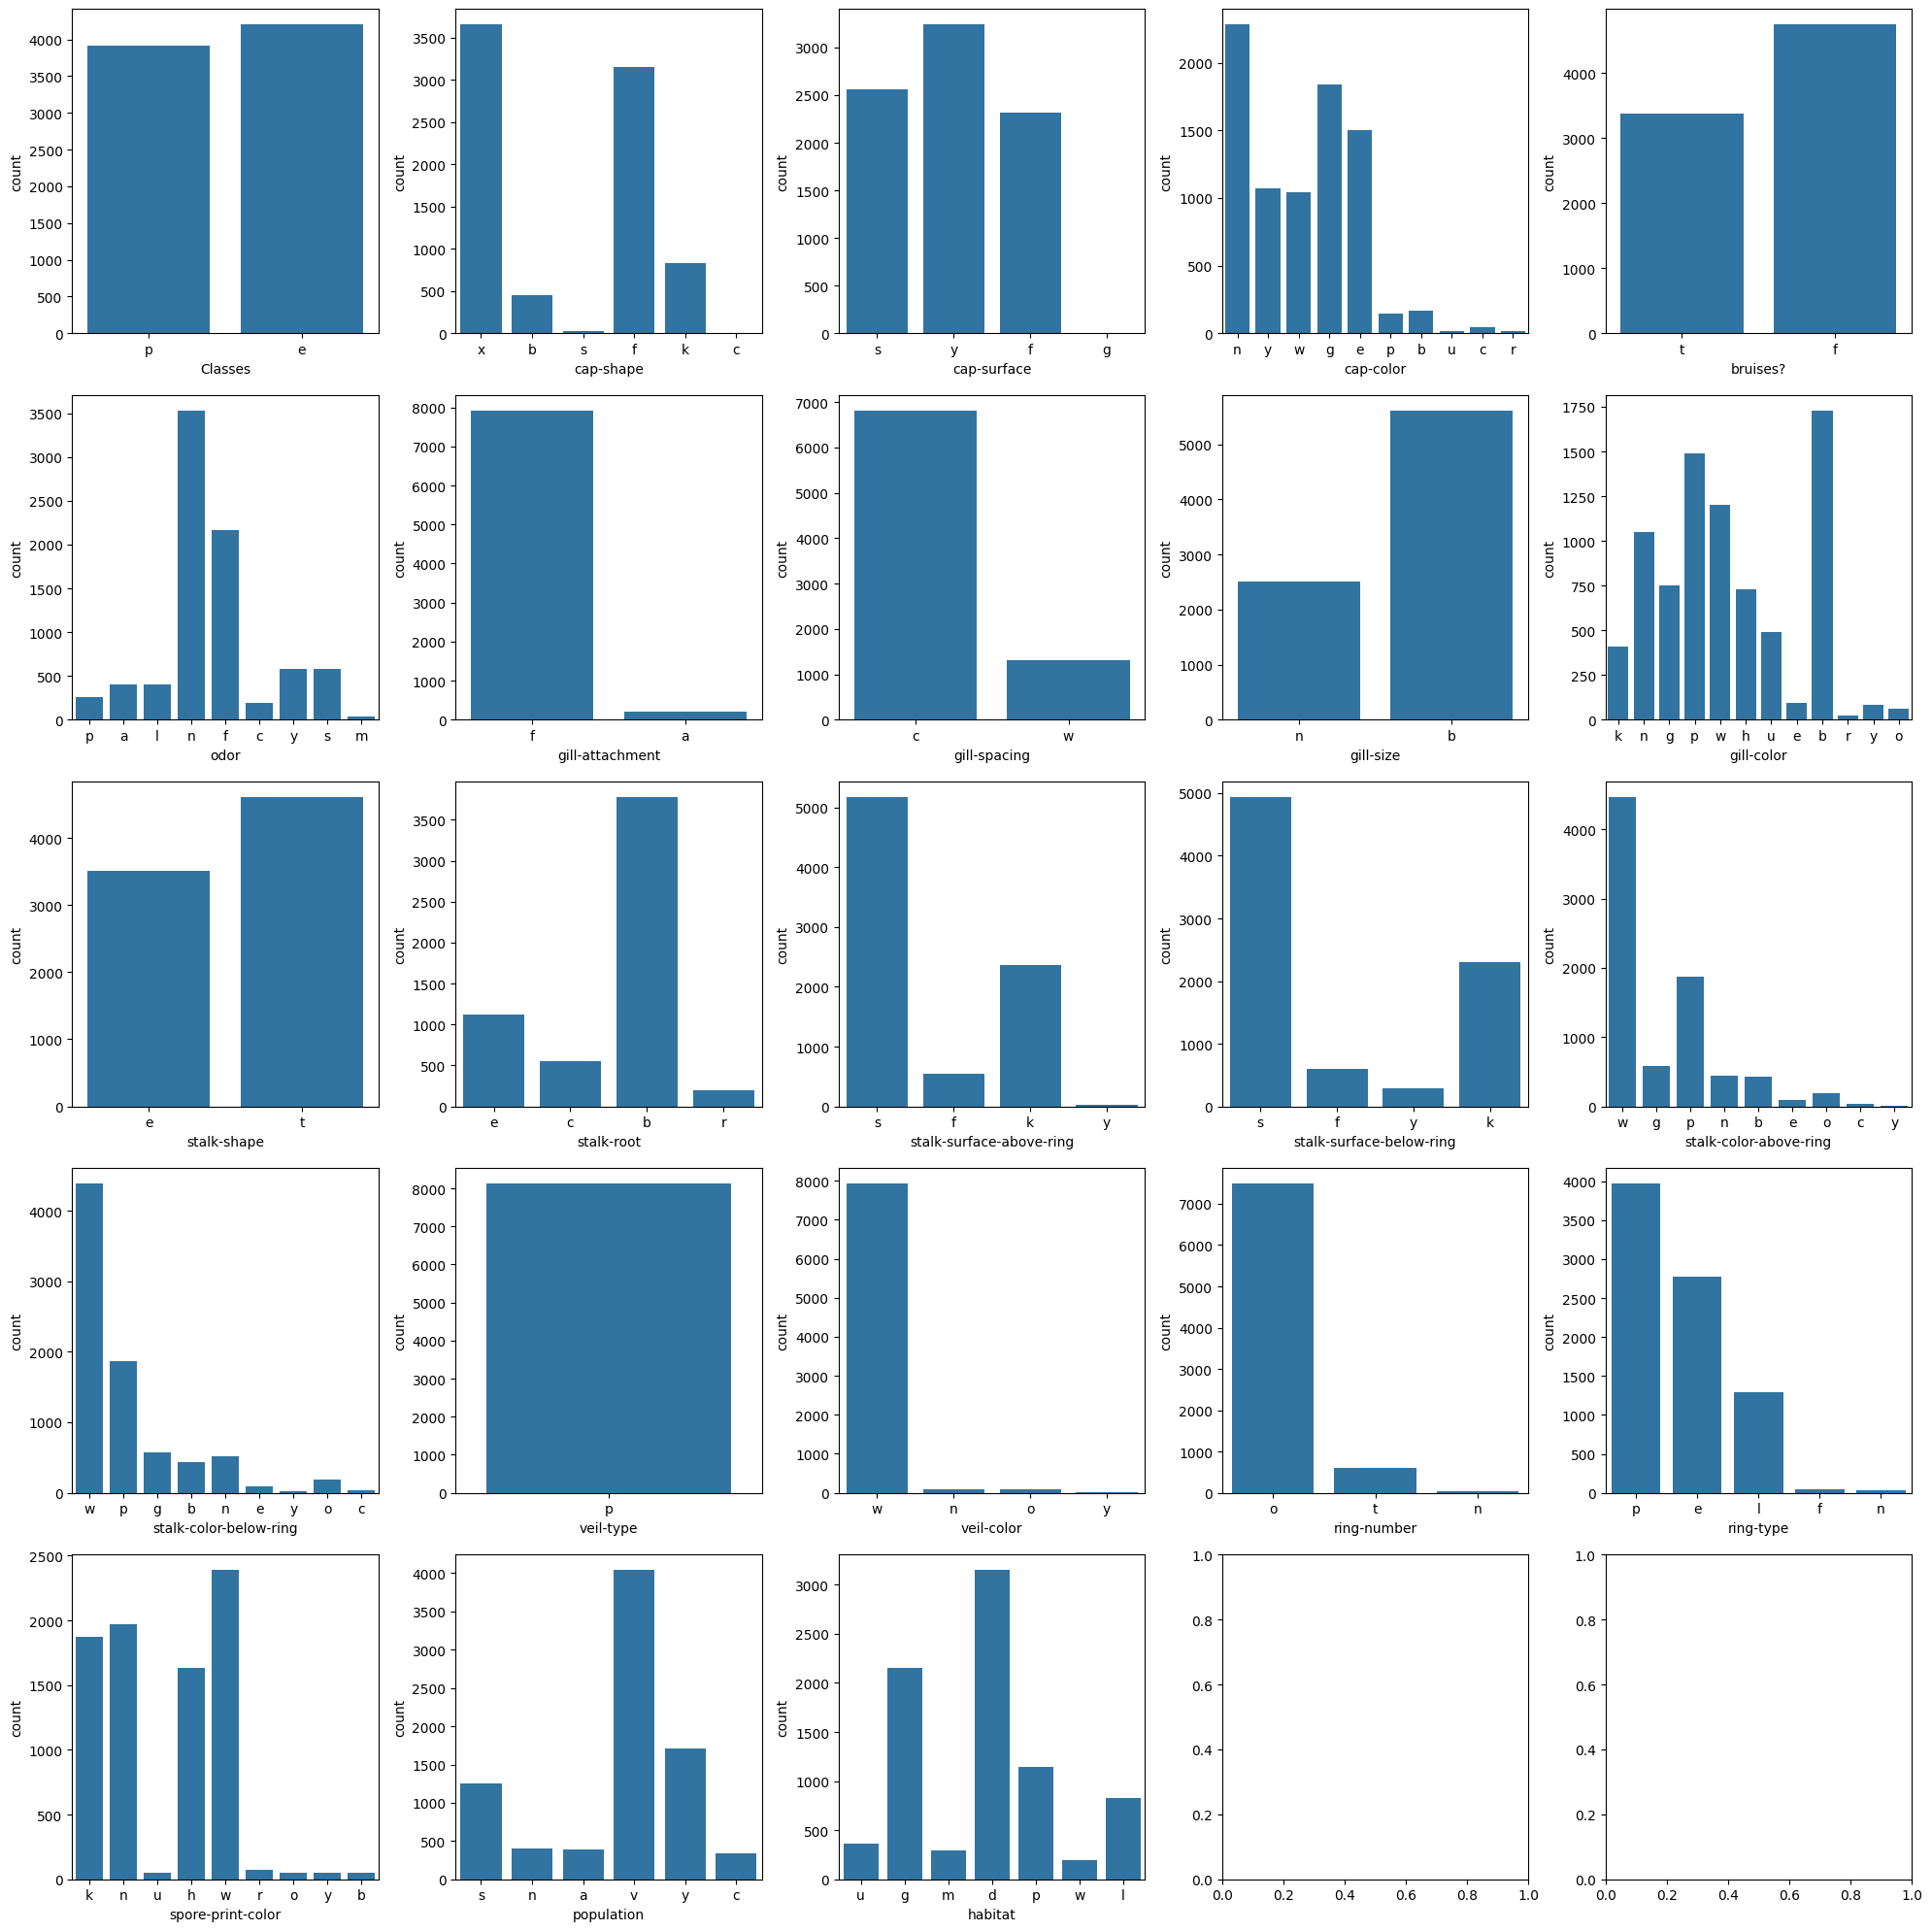

In [8]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

variables = df.columns  # Asume que df es tu DataFrame y que tiene 22 columnas

for i in range(5):
    for j in range(5):
        if 5*i+j < len(variables):  # Para evitar índices fuera de rango
            sns.countplot(x=variables[5*i+j], data=df, ax=axs[i, j])

plt.tight_layout()
plt.show()

## Distribución de datos inputados

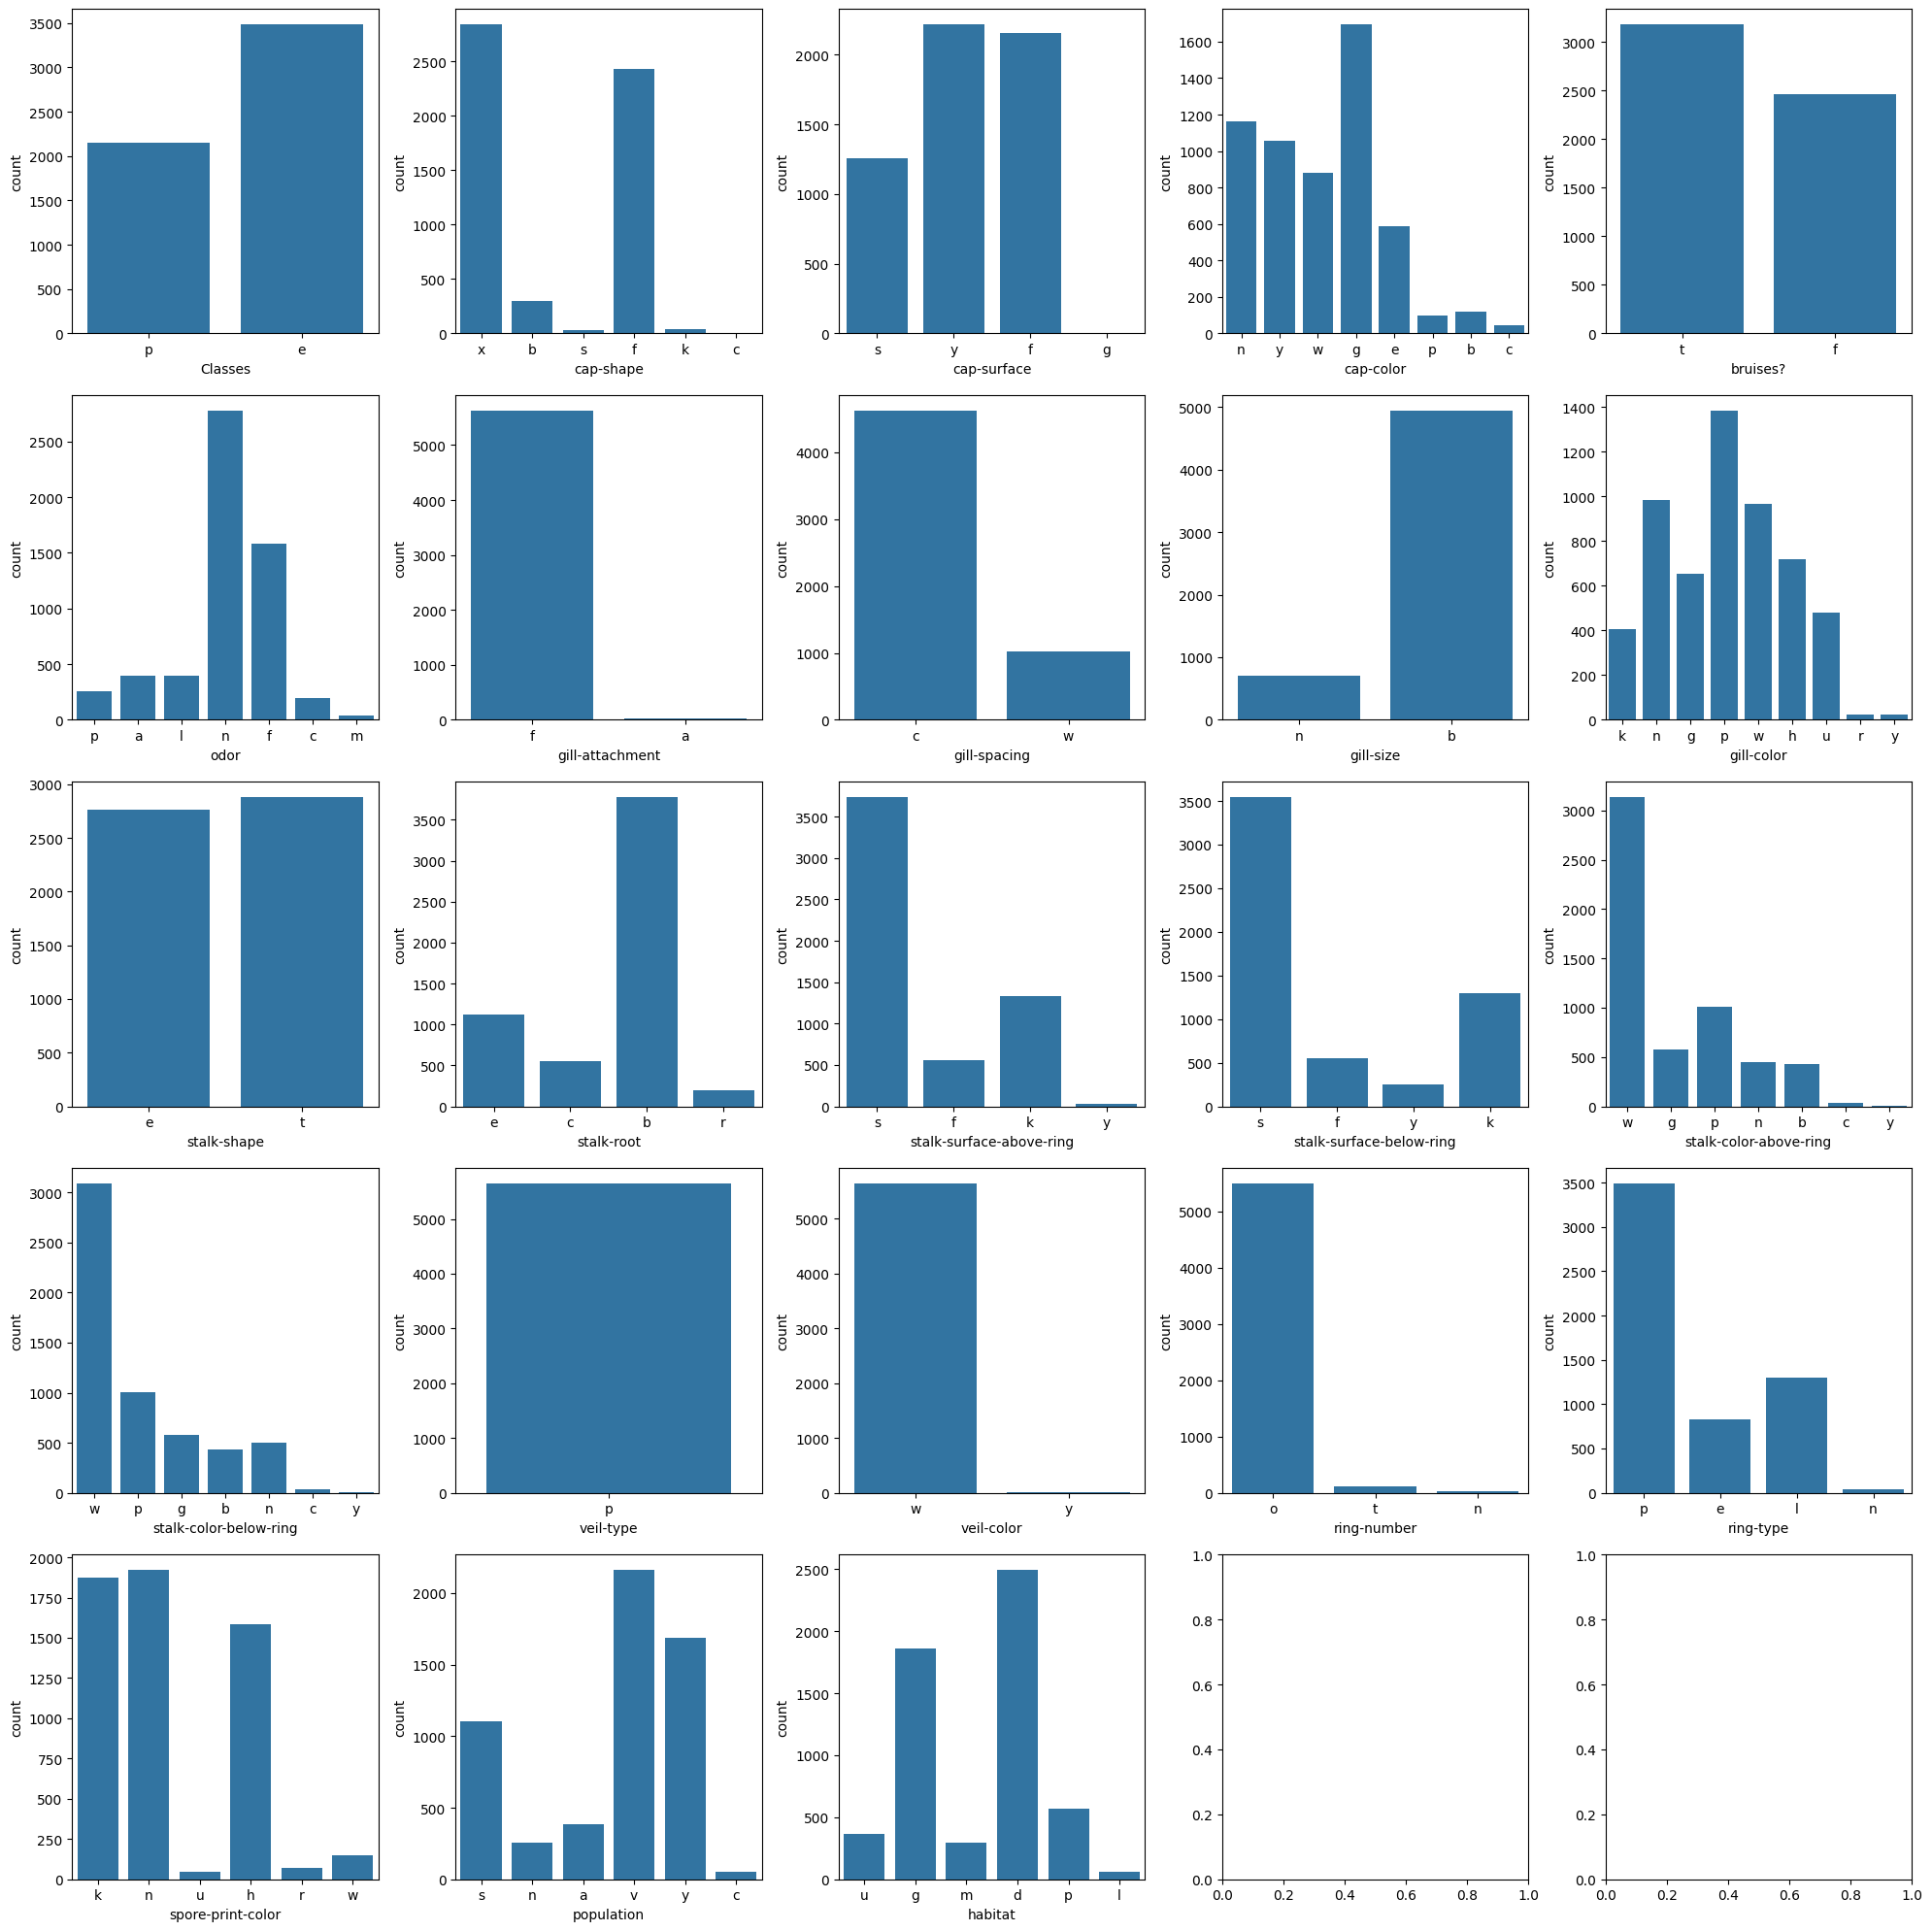

In [9]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

variables = df.columns 

for i in range(5):
    for j in range(5):
        if 5*i+j < len(variables):  
            sns.countplot(x=variables[5*i+j], data=df_inputado, ax=axs[i, j])

plt.tight_layout()
plt.show()

In [10]:
df = df_inputado

In [11]:
#reset index
df = df.reset_index(drop=True)

## Entrenar el Modelo

### Seleccionar las variables predictoras

In [12]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']]
y = df['Classes']

In [13]:
cat_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
X = pd.get_dummies(X, columns=cat_columns)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
X_train.head(5)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
4442,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
5458,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
161,True,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
525,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
30,True,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False


In [17]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
print(f"Training score: {lr_model.score(X_train,y_train)}")
print(f"Test score: {lr_model.score(X_test,y_test)}")

Training score: 1.0
Test score: 1.0


Precisión: 1.0
recall: 1.0
Score F1: 1.0
Matriz de confusión:
[[695   0]
 [  0 434]]


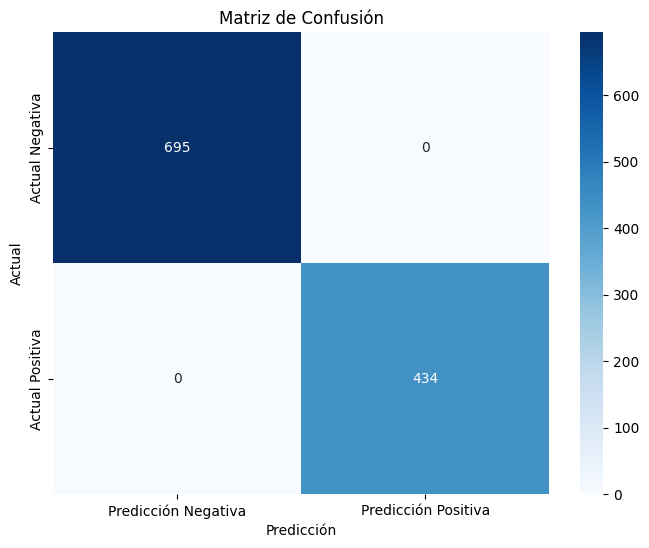

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred = lr_model.predict(X_test)

precision = precision_score(y_test, y_pred, pos_label='e')
recall = recall_score(y_test, y_pred, pos_label='e')
f1 = f1_score(y_test, y_pred, pos_label='e')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión:", precision)
print("recall:", recall)
print("Score F1:", f1)
print("Matriz de confusión:")
print(conf_matrix)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicción Negativa', 'Predicción Positiva'], yticklabels=['Actual Negativa', 'Actual Positiva'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()


# SVM

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X Train: {X_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

X Train: (4515, 98)
X Test: (1129, 98)
Y Train: (4515,)
Y Test: (1129,)


In [22]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
print(f"Training mean accuracy: {round(clf.score(X_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(X_test, y_test),3)}")

Training mean accuracy: 1.0
Test mean accuracy: 1.0


In [24]:
Amanita_phalloides = {
    'cap-shape': {1796: 'x'},
    'cap-surface': {1796: 's'},
    'cap-color': {1796: 'w'},
    'bruises?': {1796: 'f'},
    'odor': {1796: 'p'},
    'gill-attachment': {1796: 'f'},
    'gill-spacing': {1796: 'c'},
    'gill-size': {1796: 'n'},
    'gill-color': {1796: 'k'},
    'stalk-shape': {1796: 'e'},
    'stalk-root': {1796: 'b'},
    'stalk-surface-above-ring': {1796: 's'},
    'stalk-surface-below-ring': {1796: 's'},
    'stalk-color-above-ring': {1796: 'w'},
    'stalk-color-below-ring': {1796: 'w'},
    'veil-type': {1796: 'p'},
    'veil-color': {1796: 'w'},
    'ring-number': {1796: 'o'},
    'ring-type': {1796: 'p'},
    'spore-print-color': {1796: 'w'},
    'population': {1796: 's'},
    'habitat': {1796: 'u'}
}

# Crear un DataFrame
Amanita_phalloides = pd.DataFrame(Amanita_phalloides)

In [25]:
Amanita_phalloides = pd.get_dummies(Amanita_phalloides,columns=cat_columns)

In [26]:
prueba = X_test.sample()

In [27]:
data = {
    'cap-shape_b': [False],
    'cap-shape_c': [False],
    'cap-shape_f': [True],
    'cap-shape_k': [False],
    'cap-shape_s': [False],
    'cap-shape_x': [False],
    'cap-surface_f': [False],
    'cap-surface_g': [False],
    'cap-surface_s': [True],
    'cap-surface_y': [False],
    'cap-color_b': [False],
    'cap-color_c': [False],
    'cap-color_e': [False],
    'cap-color_g': [False],
    'cap-color_n': [False],
    'cap-color_p': [False],
    'cap-color_w': [True],
    'cap-color_y': [False],
    'bruises?_f': [False],
    'bruises?_t': [True],
    'odor_a': [False],
    'odor_c': [False],
    'odor_f': [False],
    'odor_l': [False],
    'odor_m': [False],
    'odor_n': [True],
    'odor_p': [False],
    'gill-attachment_a': [False],
    'gill-attachment_f': [True],
    'gill-spacing_c': [True],
    'gill-spacing_w': [False],
    'gill-size_b': [True],
    'gill-size_n': [False],
    'gill-color_g': [False],
    'gill-color_h': [False],
    'gill-color_k': [False],
    'gill-color_n': [False],
    'gill-color_p': [False],
    'gill-color_r': [True],
    'gill-color_u': [False],
    'gill-color_w': [False],
    'gill-color_y': [False],
    'stalk-shape_e': [True],
    'stalk-shape_t': [False],
    'stalk-root_b': [True],
    'stalk-root_c': [False],
    'stalk-root_e': [False],
    'stalk-root_r': [False],
    'stalk-surface-above-ring_f': [False],
    'stalk-surface-above-ring_k': [False],
    'stalk-surface-above-ring_s': [True],
    'stalk-surface-above-ring_y': [False],
    'stalk-surface-below-ring_f': [False],
    'stalk-surface-below-ring_k': [False],
    'stalk-surface-below-ring_s': [True],
    'stalk-surface-below-ring_y': [False],
    'stalk-color-above-ring_b': [False],
    'stalk-color-above-ring_c': [False],
    'stalk-color-above-ring_g': [False],
    'stalk-color-above-ring_n': [False],
    'stalk-color-above-ring_p': [False],
    'stalk-color-above-ring_w': [True],
    'stalk-color-above-ring_y': [False],
    'stalk-color-below-ring_b': [False],
    'stalk-color-below-ring_c': [False],
    'stalk-color-below-ring_g': [False],
    'stalk-color-below-ring_n': [False],
    'stalk-color-below-ring_p': [False],
    'stalk-color-below-ring_w': [True],
    'stalk-color-below-ring_y': [False],
    'veil-type_p': [True],
    'veil-color_w': [True],
    'veil-color_y': [False],
    'ring-number_n': [False],
    'ring-number_o': [False],
    'ring-number_t': [True],
    'ring-type_e': [False],
    'ring-type_l': [False],
    'ring-type_n': [False],
    'ring-type_p': [True],
    'spore-print-color_h': [False],
    'spore-print-color_k': [False],
    'spore-print-color_n': [False],
    'spore-print-color_r': [True],
    'spore-print-color_u': [False],
    'spore-print-color_w': [False],
    'population_a': [False],
    'population_c': [False],
    'population_n': [False],
    'population_s': [False],
    'population_v': [True],
    'population_y': [False],
    'habitat_d': [False],
    'habitat_g': [True],
    'habitat_l': [False],
    'habitat_m': [False],
    'habitat_p': [False],
    'habitat_u': [False]
}

# Convertir el diccionario a DataFrame
Amanita_phalloides = pd.DataFrame(data)

# Ver el DataFrame
Amanita_phalloides

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,False,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False


In [28]:
data = {
    'cap-shape_b': [False],
    'cap-shape_c': [False],
    'cap-shape_f': [False],
    'cap-shape_k': [False],
    'cap-shape_s': [False],
    'cap-shape_x': [True], #Convex
    'cap-surface_f': [False],
    'cap-surface_g': [False],
    'cap-surface_s': [False],
    'cap-surface_y': [True], #Scaly
    'cap-color_b': [True], #Brown
    'cap-color_c': [False],
    'cap-color_e': [False],
    'cap-color_g': [False],
    'cap-color_n': [False],
    'cap-color_p': [False],
    'cap-color_w': [False],
    'cap-color_y': [False],
    'bruises?_f': [True],
    'bruises?_t': [False],
    'odor_a': [False],
    'odor_c': [False],
    'odor_f': [True], #Foul
    'odor_l': [False],
    'odor_m': [False],
    'odor_n': [False],
    'odor_p': [False],
    'gill-attachment_a': [False],
    'gill-attachment_f': [True], #free
    'gill-spacing_c': [False],
    'gill-spacing_w': [True], #Crowded
    'gill-size_b': [False],
    'gill-size_n': [True], #Narrow
    'gill-color_g': [False],
    'gill-color_h': [False],
    'gill-color_k': [False],
    'gill-color_n': [False],
    'gill-color_p': [False],
    'gill-color_r': [True], #buff
    'gill-color_u': [False],
    'gill-color_w': [False],
    'gill-color_y': [False],
    'stalk-shape_e': [True], #enlarging
    'stalk-shape_t': [False],
    'stalk-root_b': [False],
    'stalk-root_c': [False],
    'stalk-root_e': [False],
    'stalk-root_r': [True], #Rooted
    'stalk-surface-above-ring_f': [False],
    'stalk-surface-above-ring_k': [True], #Silky
    'stalk-surface-above-ring_s': [False],
    'stalk-surface-above-ring_y': [False],
    'stalk-surface-below-ring_f': [False],
    'stalk-surface-below-ring_k': [True], #Silky
    'stalk-surface-below-ring_s': [False],
    'stalk-surface-below-ring_y': [False],
    'stalk-color-above-ring_b': [False],
    'stalk-color-above-ring_c': [False],
    'stalk-color-above-ring_g': [False],
    'stalk-color-above-ring_n': [True], #Brown
    'stalk-color-above-ring_p': [False],
    'stalk-color-above-ring_w': [False],
    'stalk-color-above-ring_y': [False],
    'stalk-color-below-ring_b': [False],
    'stalk-color-below-ring_c': [False],
    'stalk-color-below-ring_g': [False],
    'stalk-color-below-ring_n': [True], #Brown
    'stalk-color-below-ring_p': [False],
    'stalk-color-below-ring_w': [False],
    'stalk-color-below-ring_y': [False],
    'veil-type_p': [True], #Partial
    'veil-color_w': [True],
    'veil-color_y': [False], #brown (n)
    'ring-number_n': [False],
    'ring-number_o': [False], #One
    'ring-number_t': [False],
    'ring-type_e': [False],
    'ring-type_l': [False],
    'ring-type_n': [False],
    'ring-type_p': [True], #Pendant
    'spore-print-color_h': [False],
    'spore-print-color_k': [False],
    'spore-print-color_n': [True], #Brown
    'spore-print-color_r': [False],
    'spore-print-color_u': [False],
    'spore-print-color_w': [False],
    'population_a': [False],
    'population_c': [False],
    'population_n': [False],
    'population_s': [True], #Scattered
    'population_v': [False],
    'population_y': [False],
    'habitat_d': [True], #Woods
    'habitat_g': [False],
    'habitat_l': [False],
    'habitat_m': [False],
    'habitat_p': [False],
    'habitat_u': [False]
}

Galerina_Marginata = pd.DataFrame(data)
Galerina_Marginata

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


In [29]:
clf.predict(Amanita_phalloides)

array(['p'], dtype=object)

In [30]:
clf.predict(Galerina_Marginata)

array(['p'], dtype=object)

## Arboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [33]:
print(f'Training Score: {model.score(X_train,y_train)}')
print(f'Test Score: {model.score(X_test, y_test)}')

Training Score: 1.0
Test Score: 1.0


## Otras Pruebas

In [34]:
columnas = ['Classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv("agaricus-lepiota.data", names = columnas)

df.drop(columns=['stalk-root', 'veil-type', 'veil-color', 'gill-attachment', 'ring-number', 'cap-shape', 'cap-color', 'habitat', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'stalk-shape'], inplace=True)
X = df.drop(columns=['Classes'])
y = df['Classes']
df


,Classes,cap-surface,bruises?,odor,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-color-above-ring,ring-type,spore-print-color,population
0,p,s,t,p,c,n,k,s,w,p,k,s
1,e,s,t,a,c,b,k,s,w,p,n,n
2,e,s,t,l,c,b,n,s,w,p,n,n
3,p,y,t,p,c,n,n,s,w,p,k,s
4,e,s,f,n,w,b,k,s,w,e,n,a
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,s,f,n,c,b,y,s,o,p,b,c
8120,e,s,f,n,c,b,y,s,o,p,b,v
8121,e,s,f,n,c,b,n,s,o,p,b,c
8122,p,y,f,y,c,n,b,s,w,e,w,v


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
cat_columns = ['cap-surface', 'bruises?', 'odor', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-surface-above-ring','stalk-color-above-ring', 'ring-type', 'spore-print-color', 'population']
X = pd.get_dummies(X, columns=cat_columns)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [38]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [39]:
print(f'Training Score: {lr_model.score(X_train,y_train)}')
print(f'Test Score: {lr_model.score(X_test, y_test)}')

Training Score: 0.9997264396115443
Test Score: 0.997539975399754


/Users/skkar/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


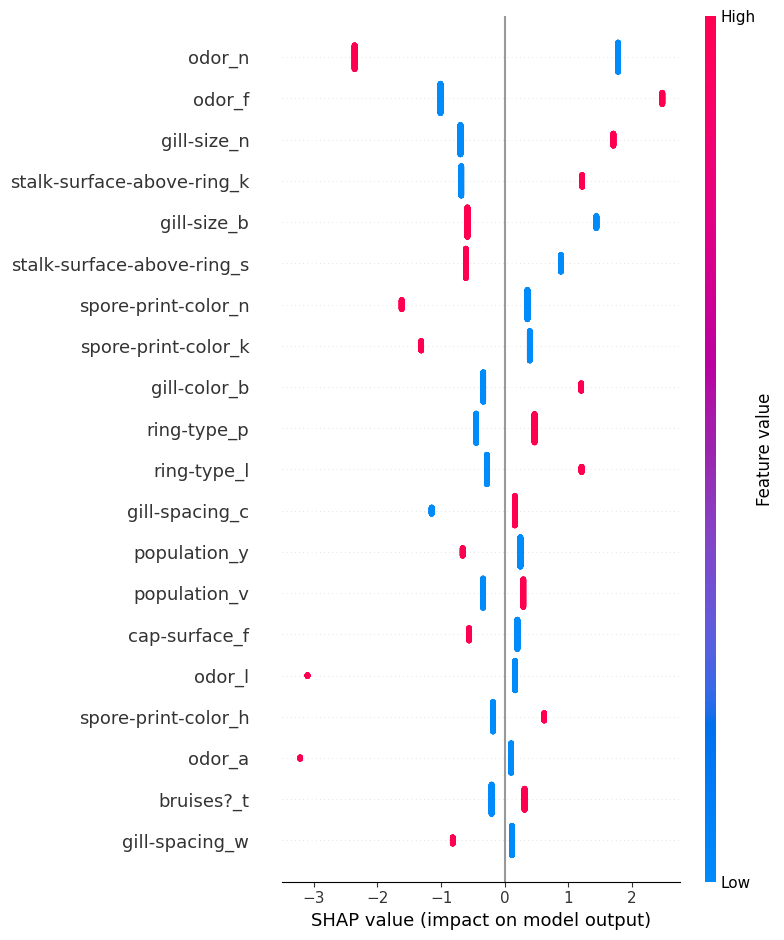

In [41]:
import shap

# Crear objeto explainer usando el conjunto de entrenamiento
explainer = shap.Explainer(lr_model, X_train)

# Calcular los valores SHAP en el conjunto de prueba
shap_values = explainer(X_test)

# Visualizar la importancia de características
shap.summary_plot(shap_values, X_test, show=False)

plt.savefig("shap_summary_plot.png", format='png') 
plt.show()

In [42]:
amanita_phalloides= {
    'cap-surface_f': {3213: False},
    'cap-surface_g': {3213: False},
    'cap-surface_s': {3213: False},
    'cap-surface_y': {3213: True},
    
    'bruises?_f': {3213: False},
    'bruises?_t': {3213: True},
    
    'odor_a': {3213: False},
    'odor_c': {3213: False},
    'odor_f': {3213: False},
    'odor_l': {3213: False},
    'odor_m': {3213: False},
    'odor_n': {3213: True},
    'odor_p': {3213: False},
    'odor_s': {3213: False},
    'odor_y': {3213: False},
    
    'gill-spacing_c': {3213: True},
    'gill-spacing_w': {3213: False},
    
    'gill-size_b': {3213: True},
    'gill-size_n': {3213: False},
    
    'gill-color_b': {3213: False},
    'gill-color_e': {3213: False},
    'gill-color_g': {3213: False},
    'gill-color_h': {3213: False},
    'gill-color_k': {3213: False},
    'gill-color_n': {3213: True},
    'gill-color_o': {3213: False},
    'gill-color_p': {3213: False},
    'gill-color_r': {3213: False},
    'gill-color_u': {3213: False},
    'gill-color_w': {3213: False},
    'gill-color_y': {3213: False},
    
    'stalk-surface-above-ring_f': {3213: False},
    'stalk-surface-above-ring_k': {3213: False},
    'stalk-surface-above-ring_s': {3213: True},
    'stalk-surface-above-ring_y': {3213: False},
    
    'stalk-color-above-ring_b': {3213: False},
    'stalk-color-above-ring_c': {3213: False},
    'stalk-color-above-ring_e': {3213: False},
    'stalk-color-above-ring_g': {3213: False},
    'stalk-color-above-ring_n': {3213: False},
    'stalk-color-above-ring_o': {3213: False},
    'stalk-color-above-ring_p': {3213: True},
    'stalk-color-above-ring_w': {3213: False},
    'stalk-color-above-ring_y': {3213: False},
    
    'ring-type_e': {3213: False},
    'ring-type_f': {3213: False},
    'ring-type_l': {3213: False},
    'ring-type_n': {3213: False},
    'ring-type_p': {3213: True},
    
    'spore-print-color_b': {3213: False},
    'spore-print-color_h': {3213: False},
    'spore-print-color_k': {3213: False},
    'spore-print-color_n': {3213: True},
    'spore-print-color_o': {3213: False},
    'spore-print-color_r': {3213: False},
    'spore-print-color_u': {3213: False},
    'spore-print-color_w': {3213: False},
    'spore-print-color_y': {3213: False},
    
    'population_a': {3213: False},
    'population_c': {3213: False},
    'population_n': {3213: False},
    'population_s': {3213: False},
    'population_v': {3213: True},
    'population_y': {3213: False}
}


# Convertir el diccionario a DataFrame
amanita_phalloides = pd.DataFrame(amanita_phalloides)

# Ver el DataFrame
amanita_phalloides

,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,bruises?_f,bruises?_t,odor_a,odor_c,odor_f,odor_l,...,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y
3213,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [43]:
lr_model.predict(amanita_phalloides)

array(['e'], dtype=object)